In [ ]:
#Question No.2      Dataset:- "CocaCola_Sales_Rawdata.xlsx"

In [ ]:
#Prepare a document for each model
#Explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [ ]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [ ]:
#Read the file [read_excel]
CocaCola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
CocaCola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
CocaCola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
CocaCola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
CocaCola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [ ]:
CocaCola.head() 

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


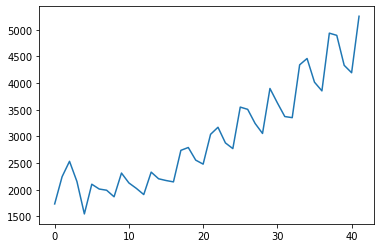

In [ ]:
#Line Plot:- [.plot()= it is going to create a Time series plot]
#Usefull for identifying TREND(increasing or decreasing & upward or downward direction)) & SEASONALITY(a.Additive= variance is constant & b.Multiplicative= variance is not constant) in our data
CocaCola.Sales.plot() 

####Data Manipulation

In [ ]:
quarter =['Q1','Q2','Q3','Q4']

In [ ]:
#Split the [Quarter] columns which is present in dataset because i want only quarters separately(Q1,Q2,Q3 & Q4) IN NEW COLUMN[quarter]
p = CocaCola["Quarter"][0]
p[0:2]
CocaCola['quarter']= 0

for i in range(42):
    p = CocaCola["Quarter"][i]
    CocaCola['quarter'][i]= p[0:2]

CocaCola.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


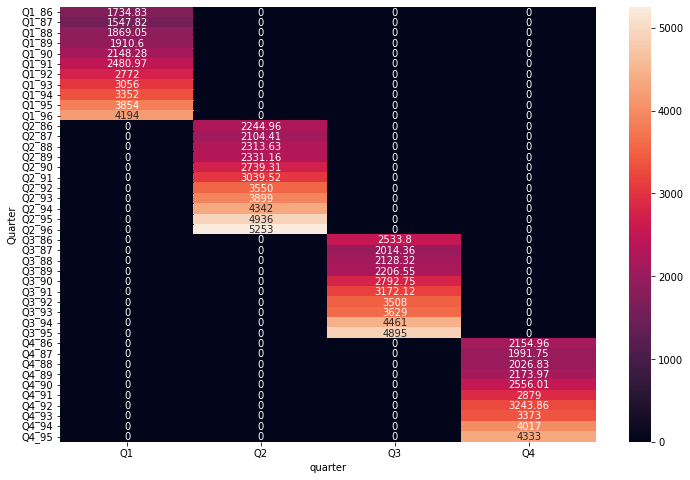

In [ ]:
#Create the Pivot table for Row= Quarter, Column= quarter & Value= Sales 
#In every quarter (Q1,Q2,Q3 & Q4) Sales is going to be increase
plt.figure(figsize=(12,8))
heatmap_Quarter_sales = pd.pivot_table(data=CocaCola,values="Sales",index="Quarter",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_Quarter_sales,annot=True,fmt="g") #fmt is format of the grid values
 

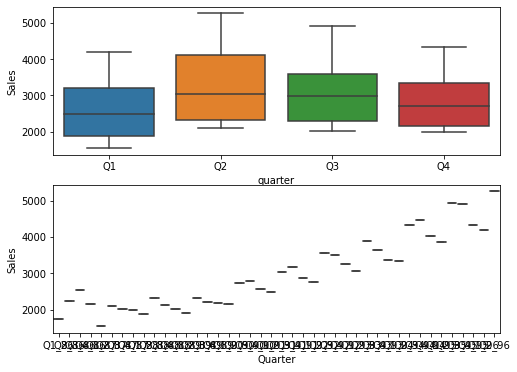

In [ ]:
#Boxplot for every quarter & Quarter
#If you see Sales in quarter of Q2 it is increased & then decreased in Q3[sometimes somewhere Sales has been going to increase & decrease]
#Whereas Quarter if you see; Sales has been going to happen same as quarter
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=CocaCola)
plt.subplot(212)
sns.boxplot(x="Quarter",y="Sales",data=CocaCola)
#So we have to go back now & using this piece of information we have to find out what are the reasons? why this is going to happen?

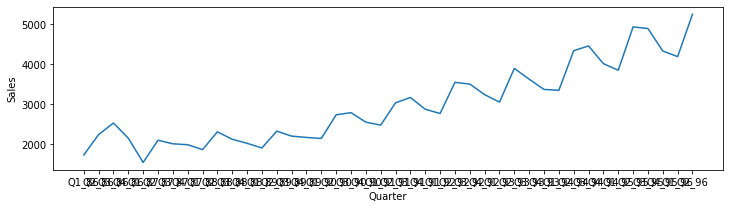

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Quarter",y="Sales",data=CocaCola) 

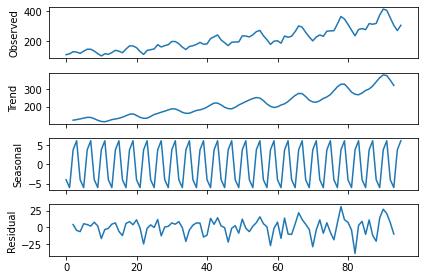

In [ ]:
#Extract underlined TREND, SEASONALITY & RESIDUAL ie; present in data
#tsa= time series analysis
#freq=4, i want 4  Quarter frequency
#It is decomposed trend, seasonality & residuals in our data
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Airlines.Passengers,freq=4)
decompose_ts_add.plot()
plt.show() 

In [ ]:
#Create dummies
quarter_dummies = pd.DataFrame(pd.get_dummies(CocaCola['quarter']))

In [ ]:
CocaCola1 = pd.concat([CocaCola,quarter_dummies],axis = 1)
CocaCola1.head()
CocaCola1

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [ ]:
#Create a [t] & [t_square] columns
CocaCola1["t"] = np.arange(1,43)
CocaCola1["t_square"] = CocaCola1["t"]*CocaCola1["t"]
CocaCola1["log_Sales"] = np.log(CocaCola1["Sales"])
CocaCola1.columns
CocaCola1.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


####Splitting Data

In [ ]:
Train = CocaCola1.head(30)
Test = CocaCola1.tail(10)  

In [ ]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

777.6287139221076

In [ ]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 


600.0893693739691

In [ ]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

680.2527854192839

In [ ]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1898.350480415752

In [ ]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

607.8520720183864

In [ ]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1951.0349399697668

In [ ]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

449.40354891634047

In [ ]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

#Whichever model is giving us least [rmse] value that is a best model to prediction among all the models
#So we have got our best model ie;MULTIPLICATIVE ADDITIVE SEASONALITY

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,449.403549
1,rmse_Exp,600.089369
4,rmse_add_sea_quad,607.852072
2,rmse_Quad,680.252785
0,rmse_linear,777.628714
3,rmse_add_sea,1898.350480
5,rmse_Mult_sea,1951.034940


####Make Prediction

In [ ]:
#Create the new dataframe for predictions of Sales in next 4 quarter
data = [['Q3_96', 'Q3'], ['Q4_96', 'Q4'], ['Q1_97', 'Q1'],['Q2_97', 'Q2']]
forecast = pd.DataFrame(data, columns = ['Quarter', 'quarter'])
forecast

,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [ ]:
#Create dummies and T and T-Squared columns
dummies = pd.DataFrame(pd.get_dummies(forecast['quarter']))                      
forecast1 = pd.concat([forecast,dummies],axis = 1)
forecast1["t"] = np.arange(1,5)
forecast1["t_square"] = forecast1["t"]*forecast1["t"]
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

   Quarter quarter  Q1  Q2  Q3  Q4  t  t_square
0   Q3_96      Q3   0   0   1   0  1         1
1   Q4_96      Q4   0   0   0   1  2         4
2   Q1_97      Q1   1   0   0   0  3         9
3   Q2_97      Q2   0   1   0   0  4        16


In [ ]:
 #Forecast the model using Multiplicative Additive Seasonality Model on entire dataset[CocaCola1]
model_full = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data =CocaCola1).fit()     
pred_new = pd.Series(model_full.predict(forecast1))                              
forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Sales'] = np.exp(forecast1['Forecasted_log'])

In [ ]:
 #Final Prediction for next 4 Quarter
Final_predict = forecast1.loc[:, ['Quarter', 'Forecasted_Sales']]               
Final_predict

,Quarter,Forecasted_Sales
0,Q3_96,1850.097087
1,Q4_96,1707.728369
2,Q1_97,1615.755820
3,Q2_97,2055.102678
